In [4]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize


def dist(N_atoms, L = 5):
    pos = L*np.random.random_sample(N_atoms*3).reshape(N_atoms,3)
    distance = cdist(pos,pos,'euclidean')
    iu1 = np.triu_indices(N_atoms)
    distance = distance[iu1]
    index = np.argwhere(distance==0)
    distance = np.delete(distance,index)
    return distance
    
def LJ(r):
    r6 = np.power(r,6)
    r12 = np.multiply(r6,r6)
    return 4*(1/r12 - 1/r6)
    
def Total_Energy(positions):

    E = LJ(positions)
    Energy = np.sum(E)
    return Energy


N_attempts = 50
f_values = []
x_values = []



def ground_state_potential(N_atom):
    for i in range(N_attempts):
        pos = dist(N_atom)
        res = minimize(Total_Energy, pos, method='CG', tol=1e-4)
        f_values.append(res.fun)
        x_values.append(res.x)
        #if i%10==0:
         #   print('step: ', i, '  values:', res.fun)

    print('The ground state potential is:  ', min(f_values))

In [3]:
%timeit ground_state_potential(5)
%timeit ground_state_potential(13)
%timeit ground_state_potential(20)


The ground state potential is:   -9.99999999999999
The ground state potential is:   -9.999999999999993
The ground state potential is:   -9.999999999999993
The ground state potential is:   -9.999999999999993
1 loop, best of 3: 1.11 s per loop
The ground state potential is:   -64.88007652365377
The ground state potential is:   -66.01929227444238
The ground state potential is:   -75.99947553133367
The ground state potential is:   -75.99947553133367
1 loop, best of 3: 33.1 s per loop
The ground state potential is:   -126.12329328868208
The ground state potential is:   -158.48196788054315
The ground state potential is:   -158.48196788054315
The ground state potential is:   -158.48196788054315
1 loop, best of 3: 2min 58s per loop


The ground state potential is:   -75.00447495577393


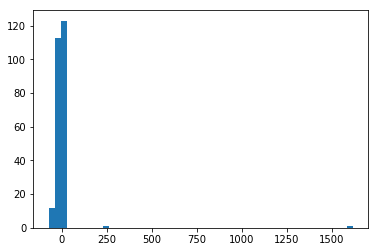

In [9]:
import matplotlib.pyplot as plt

ground_state_potential(13)
plt.hist(f_values,50)
plt.show()